In [9]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

import os
os.environ["TERRA_CONFIG_PATH"] = "/home/sabri/code/spr-21/terra_config.json"

import terra 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [32]:
few_shot = __import__("05-11_few_shot")
scribble = __import__("05-10_celeb_scribble")

[2021-05-11 23:27:22,429][WARNING][pip._internal.operations.freeze:72] :: Could not generate requirement for distribution -illow 8.2.0 (/home/common/envs/conda/envs/rg-sabri/lib/python3.8/site-packages): Parse error at "'-illow=='": Expected W:(abcd...)
task: plot_score_scribbles, run_id=339


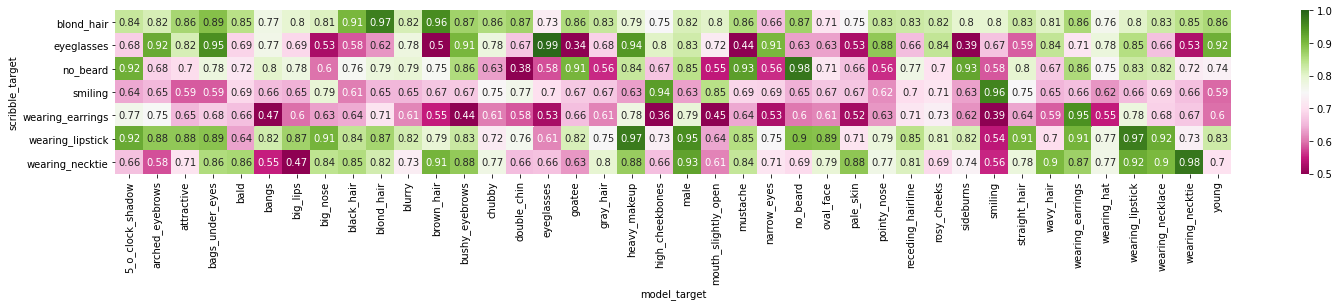

In [38]:
plot_scribble_df = scribble.plot_score_scribbles([terra.out(run_id, load=True) for run_id in [324, 320, 310]]).load()

[2021-05-11 23:27:30,774][WARNING][pip._internal.operations.freeze:72] :: Could not generate requirement for distribution -illow 8.2.0 (/home/common/envs/conda/envs/rg-sabri/lib/python3.8/site-packages): Parse error at "'-illow=='": Expected W:(abcd...)
task: plot_score_few_shot, run_id=340


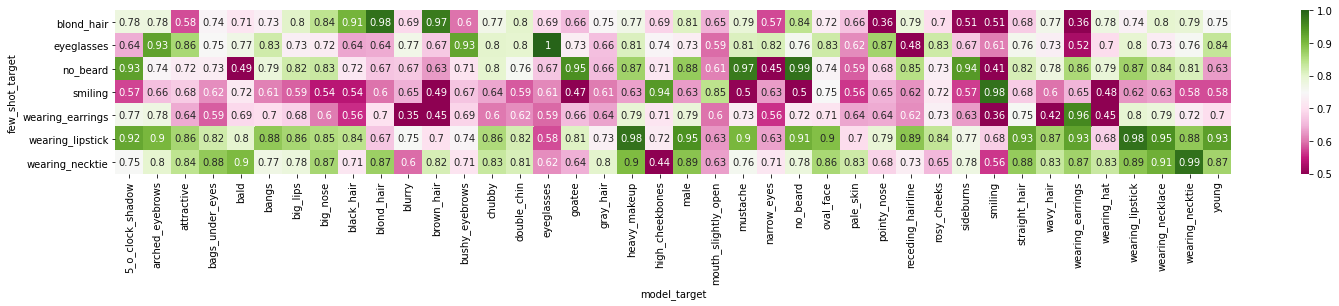

In [39]:
plot_few_df = few_shot.plot_score_few_shot(terra.out(332)).load();

In [37]:
diff_df = plot_scribble_df - plot_few_df
sns.heatmap(data=diff_df, cmap="PiYG", annot=True, vmin=0.5, vmax=1)

TypeError: unsupported operand type(s) for -: 'Artifact' and 'Artifact'

In [21]:
few_df = terra.out(334, load=True)
scribble_df = pd.concat([terra.out(run_id, load=True) for run_id in [324, 320, 310]])
few_df["strategy"] = "few-shot"
few_df["target"] = few_df["few_shot_target"]
scribble_df["strategy"] = "scribble"
scribble_df["num_examples"] = 10
scribble_df["target"] = scribble_df["scribble_target"]
df = pd.concat([few_df, scribble_df])

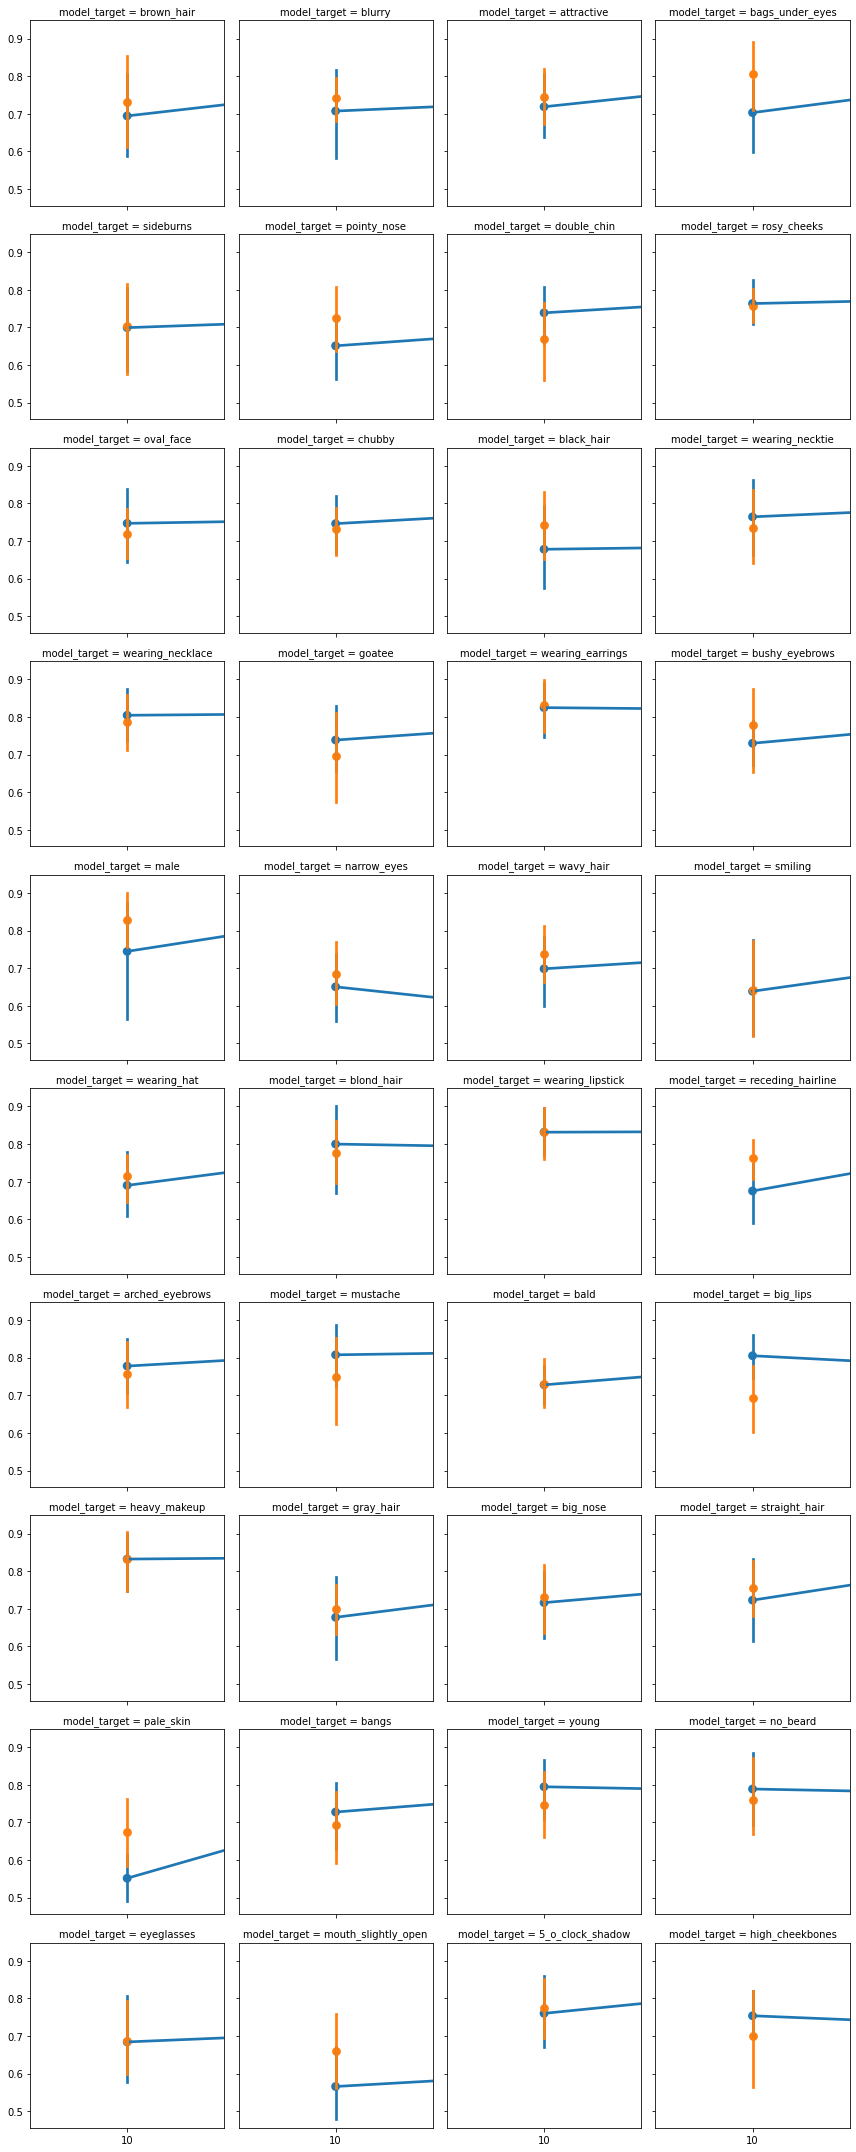

In [29]:
g = sns.FacetGrid(df, col="model_target", hue="strategy", margin_titles=True, despine=False, col_wrap=4)
g.map_dataframe(sns.pointplot, x="num_examples", y="auroc")

In [20]:
df

,num_examples,model_target,model_run_id,few_shot_target,auroc,strategy,scribble_run_id,scribble_target
0,10,brown_hair,240,wearing_necktie,0.795440,few-shot,NaN,NaN
1,10,brown_hair,240,eyeglasses,0.661358,few-shot,NaN,NaN
2,10,brown_hair,240,blond_hair,0.974171,few-shot,NaN,NaN
3,10,brown_hair,240,wearing_earrings,0.540576,few-shot,NaN,NaN
4,10,brown_hair,240,wearing_lipstick,0.714909,few-shot,NaN,NaN
...,...,...,...,...,...,...,...,...
115,10,5_o_clock_shadow,229,NaN,0.677897,scribble,282.0,eyeglasses
116,10,5_o_clock_shadow,229,NaN,0.835474,scribble,286.0,blond_hair
117,10,high_cheekbones,248,NaN,0.661437,scribble,270.0,wearing_necktie
118,10,high_cheekbones,248,NaN,0.804778,scribble,282.0,eyeglasses
